<a href="https://colab.research.google.com/github/BrianBehnke/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

sales_mean = (3505 + 2400 + 3027 + 2798 + 3700 + 3250 + 2689) / 7
print(sales_mean)

sales_var = (((3505-sales_mean)**2) + ((2400-sales_mean)**2) + 
            ((3027-sales_mean)**2) + ((2798-sales_mean)**2) +
            ((3700-sales_mean)**2) + ((3250-sales_mean)**2) +
            ((2689-sales_mean)**2)) / 7
print(sales_var)

sales_std = sales_var**.5
print(sales_std)

# used for testing accuracy of above calculations
#print(np.mean(sales))
#print(np.var(sales))
#print(np.std(sales))



3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [3]:
customers = [127, 80, 105, 92, 120, 115, 93]

covar = np.stack((sales, customers), axis=0)
print(np.cov(covar, ddof=0))


[[183761.06122449   6518.02040816]
 [  6518.02040816    249.3877551 ]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [4]:
customer_var = np.var(customers)
customer_std = np.std(customers)

#print(customer_var)
#print(customer_std)

corrcoef = covar / (sales_std * customer_std)
#print(corrcoef)
print(np.corrcoef(sales, customers))

[[1.         0.96283398]
 [0.96283398 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [16]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"

df = pd.read_csv(url)
#df.describe()

df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [12]:
df.head(10)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
5,6,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1
6,7,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1
7,8,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1
8,9,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
9,10,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

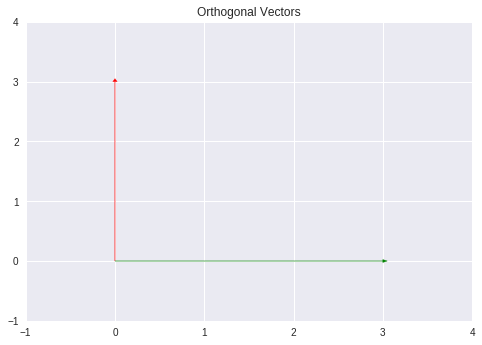

In [20]:
vector_1 = [0, 3]
vector_2 = [3, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.title("Orthogonal Vectors")
plt.show()

A synonym for orthogonal is perpendicular. 

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [25]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

np.dot(a, b)


-40

These two vectors are not orthogonal, as their dot product does not equal 0.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [30]:
c = [2, -15, 6, 20]
clength = np.linalg.norm(c)

print('The norm of c is: ', clength)

cdotc = np.dot(c,c)
print('The dot product of c dot c is: ', cdotc)

ctransc = np.transpose(c)
print('The transpose of c is: ', ctransc)

The norm of c is:  25.787593916455254
The dot product of c dot c is:  665
The transpose of c is:  [  2 -15   6  20]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [31]:
f = [4, 12, 11, 9, 2]
normf = np.linalg.norm(f)
print(normf)

19.131126469708992


In [33]:
unitf = f / normf
print(unitf)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

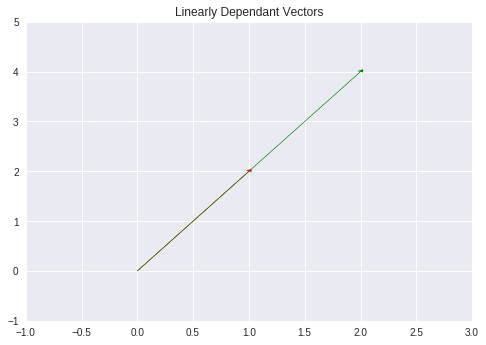

In [36]:
a = [1, 2]
b = [2, 4]

# Plot the Scaled Vectors
plt.arrow(0,0, a[0], a[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, b[0], b[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,5)
plt.title("Linearly Dependant Vectors")
plt.show()

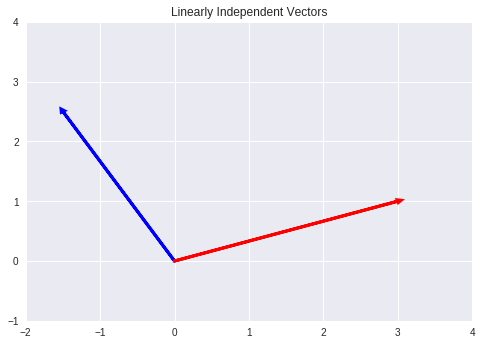

In [44]:
c = [-1.5, 2.5] 
d = [3, 1]

# Plot Vectors
plt.arrow(0,0, c[0], c[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, d[0], d[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.xlim(-2,4)          
plt.ylim(-1,4)
plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [48]:
g = [1, 2]
h = [4, 8]
gh = np.array([[1, 2], [4, 8]])
ghspan = np.linalg.det(gh)
print(ghspan)

0.0


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [51]:
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

lmnspan = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
ghspan = np.linalg.det(lmnspan)
print(ghspan)

-19.999999999999996


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



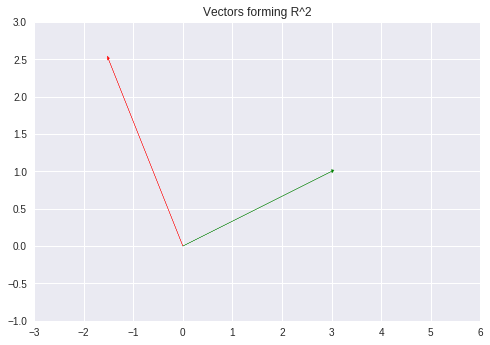

In [54]:
o = [-1.5, 2.5] 
p = [3, 1]

# Plot the Scaled Vectors
plt.arrow(0,0, o[0], o[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, p[0], p[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,6)          
plt.ylim(-1,3)
plt.title("Vectors forming R^2")
plt.show()

## 6.2 What does it mean to form a basis?

The standard basis consists of the elements of the vector space such that all coefficients but one are 0 and the non-zero one is 1. (thanks wikipedia)

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [55]:
p = np.matrix('1, 2, 3; -1, 0, 7; 4, 8, 2')
prank = np.linalg.matrix_rank(p)
print(prank)

3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

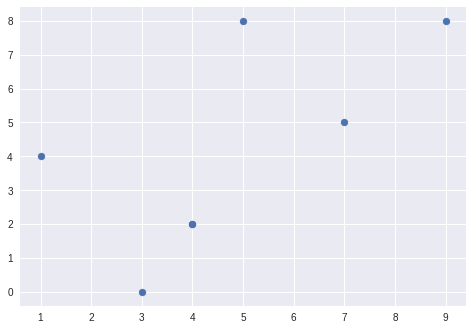

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()